# 12-Day Program Milestone Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [3]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

## How many different companies are represented in the data set?

In [5]:
with np.printoptions(threshold = np.inf):
    print(df['Company Name'].unique())

['1 State Street' '100 Church LLC' '100 Wall Investments'
 '1-10 Bush Terminal Owner LP' '120 Broadway Acquisitions JV, LLC (Ldmk)'
 '120 Wall Street, LLC' '139 ACA Realty, Inc.'
 '141 Lake Avenue Realty c/o JR Produce, Inc.' '14-10 123rd Street LLC'
 '183 Lorriane Street LLC' '195 Broadway, LLC' '2 Rector Street (NY) LLC'
 '21st Century Optics, Inc.' '25 Broadway (Ldmk)' '4Over4.com'
 '538-540 West 35 Corp' '55 Water, LLC' '72andSunny Partners LLC'
 '75 Broad Street' 'A & L Scientific Corp.' 'A.K.S. International, Inc'
 'ABEL CINE TECH, INC.' 'ABIGAL PRESS, INC.' 'Accenture LLP'
 'Achieve Beyond, Inc. (Formerly Bilinguals, Inc.)'
 'Action Carting Environmental Services, Inc' 'ADP Oak Point LLC'
 'AECOM Technical Services Inc' 'Aesthetonics, Inc.'
 'AFC INDUSTRIES, INC.' 'African Services Committee, Inc.'
 'Aids Vaccine Advocacy Coalition' 'ALADDIN BAKERS, INC/Bread Head, LLC.'
 'Albert Einstein College of Medicine R&D' 'Alchemy Paintworks LLC'
 'All City Metal, Inc.' 'ALLE PROCESSING 

In [6]:
nCompanies = df['Company Name'].nunique()
print(f'There are {nCompanies} companies.')

There are 439 companies.


## What is the total number of jobs created for businesses in Queens?

Here, I assume a null value is 0 jobs created, since the 'Value_of_ECSP_Data_Dictionary.xlsx' document does not give the interpretation of null values.

Also, I assume we are interested in 'Queens' in the 'Borough' column.  I don't know how to interpret the 'City' column.

In [7]:
nJobsCreatedinQueens = int(df[df['Borough'].str.lower() == 'queens']['Job created'].sum())
print(f'There were {nJobsCreatedinQueens} jobs created in Queens.')

There were 102 jobs created in Queens.


## How many different unique email domains names are there in the data set?

In [8]:
# Number of null values
df['company email'].isna().sum()

17

In [9]:
# Malformed emails
df[df['company email'].str.split('@').str.len().fillna(2) != 2]['company email']

75         billieannplastics.com
87     jgewitrtzbrooklynnets.com
187         officegreenfelds.com
306    adenovarebiologistics.com
419      urbangreenfurniture.com
Name: company email, dtype: object

In [10]:
nDomains = df['company email'].str.extract(r'^[^@]+@(.+\..+)$').squeeze().str.lower().nunique(dropna = True)
print(f'There are {nDomains} unique email domains.')

There are 355 unique email domains.


In [11]:
#Note that the following solution:
print(df['company email'].str.split('@').str[1].str.lower().nunique(dropna = True))
# doesn't work because it contains another malformed email:
print(df[df['company email'].str.contains('hydr',na=False)]['company email'].values)

356
['mikeb@hydromx']


## Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [12]:
NTAcounts = df.groupby('NTA')['Company Name'].nunique()
NTAsavings = df[df['NTA'].isin(NTAcounts[NTAcounts >= 5].index)].groupby('NTA').agg({'Total Savings': 'mean', 'Job created': 'sum'})
# The 'Total Savings' column is the mean total savings, while the 'Job created' column is total jobs created for that NTA.
print(NTAsavings)

                                                  Total Savings  Job created
NTA                                                                         
Battery Park City-Lower Manhattan                 469890.796667          0.0
Bushwick South                                     26140.455000         10.0
Carroll Gardens-Columbia Street-Red Hook           24337.390000          0.0
College Point                                      17159.372857          2.0
Crown Heights North                                 4036.298889          0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill   59950.340000          0.0
East New York                                      48433.093333         15.0
East Williamsburg                                  13990.626364          0.0
Greenpoint                                          9753.649286          0.0
Hunters Point-Sunnyside-West Maspeth               23931.398933          0.0
Hunts Point                                        39246.016154         12.0

In [13]:
# Save to CSV file
NTAsavings.to_csv('meanTotalSavings_and_totalJobsCreated.csv')

## Scatter plot of jobs created versus average savings

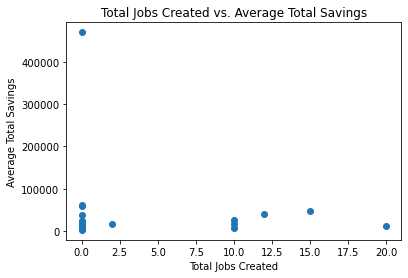

In [14]:
# Linear-Linear Plot
fig, ax = plt.subplots(1)
ax.scatter(NTAsavings['Job created'], NTAsavings['Total Savings'])
ax.set_xlabel('Total Jobs Created')
ax.set_ylabel('Average Total Savings')
ax.set_title('Total Jobs Created vs. Average Total Savings');

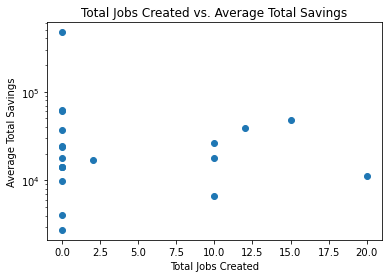

In [15]:
# Linear-Log Plot
fig, ax = plt.subplots(1)
ax.scatter(NTAsavings['Job created'], NTAsavings['Total Savings'])
ax.set_yscale('log')
ax.set_xlabel('Total Jobs Created')
ax.set_ylabel('Average Total Savings')
ax.set_title('Total Jobs Created vs. Average Total Savings');

## Histogram of the log of the average total savings

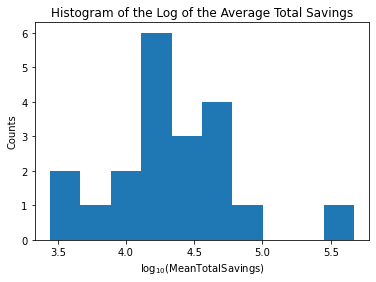

In [16]:
fig, ax = plt.subplots(1)
ax.hist(np.log10(NTAsavings['Total Savings']), bins = 10)
ax.set_xlabel(r'$\log_{10}(\mathrm{Mean Total Savings})$')
ax.set_ylabel('Counts')
ax.set_title('Histogram of the Log of the Average Total Savings');

## Line plot of the total jobs created for each month

There are two ways to interpret this:
1. Plot total jobs created for each actual month (e.g. January 2005 and January 2006 are distinct months).
2. Plot total jobs aggregated for each of the 12 categories {January, ..., December}.

In [17]:
# Convert to datetime
df['Effective Date'] = pd.to_datetime(df['Effective Date'])

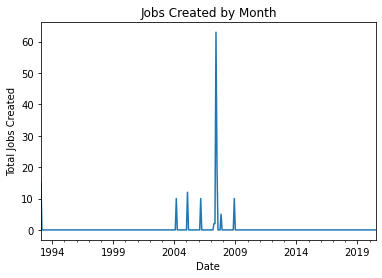

In [18]:
# Interpretation 1

ax = df.groupby(pd.Grouper(key = 'Effective Date', freq = 'M'))['Job created'].agg('sum').plot()
ax.set_xlabel('Date')
ax.set_ylabel('Total Jobs Created')
ax.set_title('Jobs Created by Month');

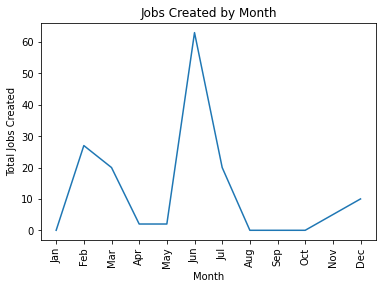

In [19]:
# Interpretation 2

import datetime
from matplotlib.ticker import FixedLocator

ax = df.groupby(df['Effective Date'].dt.month)['Job created'].agg('sum').plot()
ax.xaxis.set_major_locator(FixedLocator(range(1, 12 + 1)))
ax.set_xticklabels([datetime.datetime.strftime(datetime.datetime.strptime(str(m), '%m'), '%b') for m in range(1, 12 + 1)], rotation = 90)
ax.set_xlabel('Month')
ax.set_ylabel('Total Jobs Created')
ax.set_title('Jobs Created by Month');